In [39]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from library.sb_utils import save_file

In [2]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [3]:
#import df
df = pd.read_csv('../data/df_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156608 entries, 0 to 156607
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        156608 non-null  int64  
 1   acousticness      156608 non-null  float64
 2   artists           156608 non-null  object 
 3   danceability      156608 non-null  float64
 4   duration_ms       156608 non-null  int64  
 5   energy            156608 non-null  float64
 6   explicit          156608 non-null  int64  
 7   instrumentalness  156608 non-null  float64
 8   key               156608 non-null  int64  
 9   liveness          156608 non-null  float64
 10  loudness          156608 non-null  float64
 11  mode              156608 non-null  int64  
 12  name              156608 non-null  object 
 13  popularity        156608 non-null  int64  
 14  speechiness       156608 non-null  float64
 15  tempo             156608 non-null  float64
 16  valence           15

In [4]:
#drop 1st column
df=df.drop(columns=['Unnamed: 0'])
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1921-30
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1921-30
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1921-30
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1921-30
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1921-30


In [5]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1921-30
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1921-30
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1921-30
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1921-30
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1921-30


In [6]:
X = df.drop(columns=['popularity', 'name', 'artists', 'decade'])
y = df.popularity

In [7]:
#split data into training/test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=42)




In [8]:
X_train.head()




,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
130332,0.00325,0.239,371027,0.913,0,0.071500,2,0.858,-7.724,1,0.0814,95.097,0.376,1976
54977,0.30100,0.719,107400,0.215,1,0.000062,0,0.128,-18.570,1,0.8660,117.809,0.620,1945
19708,0.47900,0.434,204200,0.561,0,0.000417,11,0.116,-10.573,1,0.0363,179.554,0.749,1977
44002,0.92700,0.580,172240,0.330,0,0.000149,7,0.206,-14.321,1,0.0280,105.107,0.403,1986
118072,0.01190,0.781,213309,0.768,0,0.000005,11,0.325,-5.991,1,0.0394,123.070,0.486,2018


In [9]:
#scale data
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [10]:
lr=LinearRegression()
lr.fit(X_tr_scaled, y_train)

LinearRegression()

In [11]:
y_tr_pred = lr.predict(X_tr_scaled)
y_te_pred = lr.predict(X_te_scaled)

In [12]:
#assess model performance
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.7945808776715917, 0.7933775047154452)

In [13]:
#Refining the Linear Model
pipe = make_pipeline(SimpleImputer(strategy= 'median'),
                    StandardScaler(), 
                    SelectKBest(f_regression),
                    LinearRegression())

In [14]:
#fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fc911d33ee0>)),
                ('linearregression', LinearRegression())])

In [15]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [16]:
#Assessing using cross-validation
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [17]:
cv_scores = cv_results['test_score']
cv_scores

array([0.79260505, 0.78955414, 0.79647177, 0.7984508 , 0.79540094])

In [18]:
np.mean(cv_scores), np.std(cv_scores)

(0.7944965390564278, 0.0031100077248183322)

In [19]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7945298030845448, 0.7933229245865185)

In [20]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [21]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [22]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fc911d33ee0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14]})

In [23]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [24]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 12}

In [25]:
rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47))

In [26]:
rf_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)

In [27]:
print(rf_cv_results)

{'fit_time': array([85.82104087, 81.34816909, 89.69203019, 89.37144399, 87.18922997]), 'score_time': array([0.77852106, 0.68726611, 0.83079505, 0.87703204, 0.7254889 ]), 'test_score': array([0.83188731, 0.82727536, 0.8348196 , 0.83845775, 0.83505322])}


In [28]:
rf_cv_scores = rf_cv_results['test_score']



In [29]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8334986468882487, 0.003743797032533393)

In [30]:
n_est = [int(n) for n in range(49, 100)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'standardscaler': [StandardScaler(), None]}

In [31]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [32]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [49, 50, 51, 52,
                                                                 53, 54, 55, 56,
                                                                 57, 58, 59, 60,
                                                                 61, 62, 63, 64,
                                                                 65, 66, 67, 68,
                                                                 69, 70, 71, 72,
                                                                 73, 74, 75, 76,
                                                                 77, 78, ...],
                         'standardscaler': [StandardScaler(), None]})

In [33]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 99, 'standardscaler': None}

In [35]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.83218372, 0.82717502, 0.83471531, 0.83861468, 0.83500123])

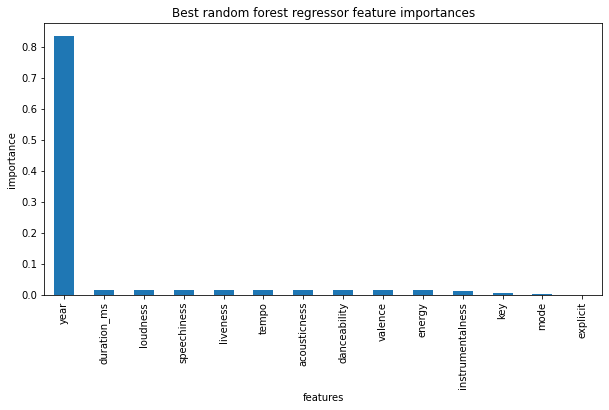

In [34]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [36]:
best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [40]:
modelpath = '../models'
save_file(best_model, 'spotify_popularity_model.pkl', modelpath)

Directory ../models was created.
Writing file.  "../models/spotify_popularity_model.pkl"
